In [6]:
#count of popular words from IMDB dataset
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import nltk
#nltk.download()


In [13]:
top_Words = 10

df = pd.read_csv('C:\Users\payel\Desktop\Data Analysis\imdb-5000-movie-dataset.zip',
                 usecols=['movie_title','plot_keywords', 'genres', 'title_year', 'director_name', 'imdb_score', 'num_critic_for_reviews'])
df.head()


,director_name,num_critic_for_reviews,genres,movie_title,plot_keywords,title_year,imdb_score
0,James Cameron,723.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,2009.0,7.9
1,Gore Verbinski,302.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,2007.0,7.1
2,Sam Mendes,602.0,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,2015.0,6.8
3,Christopher Nolan,813.0,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,2012.0,8.5
4,Doug Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1


In [3]:
df.duplicated().sum()

122

In [4]:
df[df.duplicated()]['movie_title']

137                          The Legend of Tarzan 
187     The Twilight Saga: Breaking Dawn - Part 2 
204                           Godzilla Resurgence 
303                                           Pan 
389                                Fantastic Four 
395                      The Fast and the Furious 
590                                      Hercules 
656                                  Total Recall 
794                                  The Avengers 
1122                                        Dredd 
1220                                     Unbroken 
1305                          Victor Frankenstein 
1332                     The Fast and the Furious 
1449                                    From Hell 
1508                                   The Lovers 
1582                                 Ghostbusters 
1805                              The Jungle Book 
1994                            Snakes on a Plane 
2020                                  Point Break 
2049                           

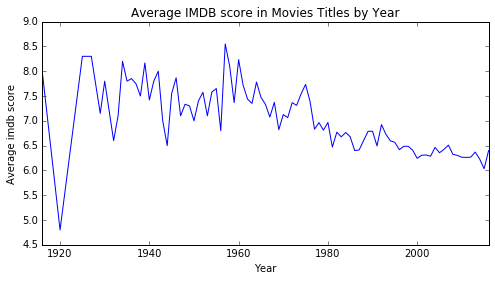

In [7]:
group_by_year = df.groupby('title_year')
group_by_year['imdb_score'].mean().plot(kind='line', figsize=(8,4))
plt.title('Average IMDB score in Movies Titles by Year')
plt.ylabel('Average imdb score')
plt.xlabel('Year')

Including STOPWORDS:
     Word  Frequency
0      in        339
1  female        301
2   title        289
3  nudity        259
4    love        248
5      on        240
6  school        238
7  friend        228
8      of        222
9     the        212
Excluding STOPWORDS:
     Word  Frequency
0  female        301
1   title        289
2  nudity        259
3    love        248
4  school        238
5  friend        228
6  police        210
7    male        205
8   death        195
9     sex        192


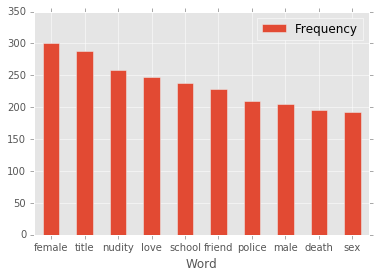

In [8]:
text = df.plot_keywords.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ') #plot_keywords is a column name #str.cat(sep=''), sep refers to the string/none
words = nltk.tokenize.word_tokenize(text)
No_of_words = nltk.FreqDist(words) # FreqDist class is used to encode “frequency distributions”, which count the number of times of the word

stopwords = nltk.corpus.stopwords.words('english') #stopwords.words('english') returns a list of lowercase stop words.

words_without_stopwords = nltk.FreqDist(w for w in words if w not in stopwords) 
print('Including STOPWORDS:')
result = pd.DataFrame(No_of_words.most_common(top_Words), columns=['Word', 'Frequency'])
print(result)

print("=" * 50)

print('Excluding STOPWORDS:')
rslt = pd.DataFrame(words_without_stopwords.most_common(top_Words),columns=['Word', 'Frequency'])
print(rslt)

rslt = pd.DataFrame(words_without_stopwords.most_common(top_Words),columns=['Word', 'Frequency']).set_index('Word') #setting index , X-axis by  Word column

matplotlib.style.use('ggplot') #ggplot style is by default in matplotlib

rslt.plot.bar(rot=0) #rot=0 is to rotate the X-axis tick labels

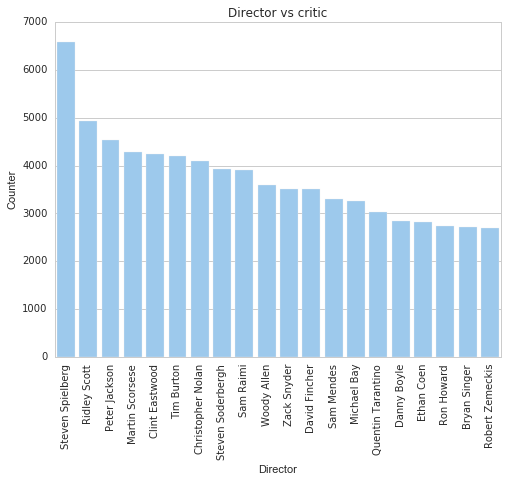

In [16]:
import seaborn as sns
sns.set_style("whitegrid")

df_copy = df.copy().dropna()
director_critic_counts = df_copy.groupby(df_copy['director_name'])['num_critic_for_reviews'].sum()
director_critic_indx = director_critic_counts.sort_values(ascending=False)[:20].index
director_critic_values = director_critic_counts.sort_values(ascending=False)[:20].values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = director_critic_indx,
            y = director_critic_values,
            color='#90caf9',
            ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Director vs critic')
plt.ylabel('Counter')
plt.xlabel('Director')
del fig,ax,ticks

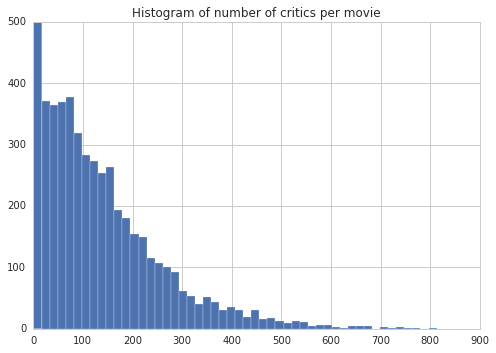

In [17]:
plt.hist(df.num_critic_for_reviews.dropna(), 50);
plt.title('Histogram of number of critics per movie')